testietaisyys=  1.7320508075688772
K-means etäisyystesti läpäisty!

Tiedostosta löytyy 2876 triplettiä (x, y, z).

Suodatuksen jälkeen tiedostosta löytyy 2763 triplettiä (x, y, z).

Minimiarvot:
 sensorvalue_a    1163.0
sensorvalue_b    1174.0
sensorvalue_c    1175.0
dtype: float64

Maksimiarvot:
 sensorvalue_a    1849.0
sensorvalue_b    1836.0
sensorvalue_c    1958.0
dtype: float64

Satunnaisesti arvotut keskipisteet:  [[1355.34630867 1785.75783532 1837.71387993]
 [1658.8225249  1467.80270563 1729.57289702]
 [1644.65698841 1312.00356457 1205.92372936]
 [1328.92324928 1360.28324816 1413.76801778]
 [1364.1054133  1693.46705072 1817.42276095]
 [1495.48998085 1693.31002492 1688.61067489]]

Keskipisteiden kumulatiiviset summat:
 [[      0.       0.       0.]
 [1482668. 1283099. 1461783.]
 [ 587324.  615590.  484669.]
 [1443485. 1405851. 1530838.]
 [   2691.    2840.    3540.]
 [ 660980.  769777.  702041.]]

Keskipisteiden datapisteiden laskurit:
 [   0.  889.  389. 1049.    2.  434.]

Kesk

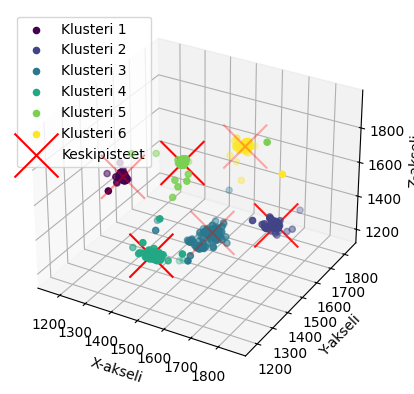


Järjestetyt keskipisteet (pienin x, suurin x, pienin y, suurin y, pienin z, suurin z):
1. [1208.79241071 1501.27678571 1514.25      ]
2. [1802.99791232 1487.41127349 1505.78496868]
3. [1502.35932203 1210.78305085 1423.08305085]
4. [1523.24768519 1774.34722222 1618.00925926]
5. [1507.17412935 1585.76119403 1245.0199005 ]
6. [1508.86893204 1392.61893204 1806.11407767]

keskipisteet.h luotu.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D

'''
# Esimerkki
testidata = np.zeros((10,3))
print(testidata)
for i in range (3):
  testidata[i,:] = np.array((10,5,5))

print(testidata)
'''

# Ladataan tiedosto omalta koneelta
#uploaded = files.upload()
#print(uploaded)

#testi kahden 3D-pisteen välisen etäisyyden laskemiseen
def testiPisteMatkalle ():
  testiPiste1 =np.array([1,1,1])
  testiPiste2 =np.array([2,2,2])
  testietaissyys = np.linalg.norm(testiPiste1 - testiPiste2)
  print("testietaisyys= ",testietaissyys)
  return testietaissyys

testiPisteMatkalle()

# Testifunktio K-means-laskennasta
def test_kmeans_etaisyys():
    testipisteet = [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
    kentroidit = [[1, 1, 1], [2, 2, 2]]

    # Lasketaan etäisyydet ensimmäiseen centroidiin
    etaisyydet = [np.linalg.norm(np.array(p) - np.array(kentroidit[0])) for p in testipisteet]

    # Odotetut etäisyydet
    odotetut = [
        0,
        np.linalg.norm(np.array([2, 2, 2]) - np.array([1, 1, 1])),
        np.linalg.norm(np.array([3, 3, 3]) - np.array([1, 1, 1]))
    ]

    # Testataan, että lasketut etäisyydet vastaavat odotettuja
    assert all(np.isclose(e, o) for e, o in zip(etaisyydet, odotetut)), f"Etäisyydet väärin: {etaisyydet}"
    print("K-means etäisyystesti läpäisty!")

test_kmeans_etaisyys()

# Funktio kahden 3D-pisteen välisen etäisyyden laskemiseen
def etaisyys_3d(piste1, piste2):
    piste1 = np.array(piste1)
    piste2 = np.array(piste2)
    etaisyys = np.linalg.norm(piste1 - piste2)
    return etaisyys

# Excel-tiedosto Pandas DataFrameen
data = pd.read_csv('data_from_mysql_where_g16.csv')

# Suodatetaan pois kaikki rivit, joissa 'sensorvalue_d' on 0
data_filtered = data[data['sensorvalue_d'] != 0].reset_index(drop=True)

x = data_filtered['sensorvalue_a']
y = data_filtered['sensorvalue_b']
z = data_filtered['sensorvalue_c']

# Selvitetään kuinka monta triplettiä (x, y, z) löytyy
numberOfRows = len(data)
print(f"\nTiedostosta löytyy {numberOfRows} triplettiä (x, y, z).")

numberOfRowsFiltered = len(data_filtered)
print(f"\nSuodatuksen jälkeen tiedostosta löytyy {numberOfRowsFiltered} triplettiä (x, y, z).")

# Lasketaan minimi- ja maksimiarvot
min_vals = data_filtered[['sensorvalue_a', 'sensorvalue_b', 'sensorvalue_c']].min()
max_vals = data_filtered[['sensorvalue_a', 'sensorvalue_b', 'sensorvalue_c']].max()

print("\nMinimiarvot:\n", min_vals)
print("\nMaksimiarvot:\n", max_vals)

# Arvotaan keskikohdat satunnaisesti
n_clusters = 6  # Määritellään, kuinka monta klusteria
random_centroids = np.random.uniform(low=min_vals.values, high=max_vals.values, size=(n_clusters, len(min_vals)))

# Tulostetaan satunnaisesti arvotut keskipisteet
print("\nSatunnaisesti arvotut keskipisteet: ", random_centroids)

centerPointCumulativeSum = np.zeros_like(random_centroids)  # 6 riviä, 3 saraketta
Counts = np.zeros(n_clusters)  # 1 rivi, 6 saraketta
Distances = np.zeros((n_clusters))

# Värit, jotka liitetään kullekin klusterille
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))  # Käytetään viridis värejä

# Taulukko, johon tallennetaan, mihin klusteriin kukin datapiste kuuluu
cluster_indices = np.zeros(numberOfRowsFiltered)

# Ulompi for-looppi käy läpi kaikki datapisteet
# Lasketaan jokaisen datapisteen etäisyys kaikkiin keskipisteisiin
# Selvitetään lähin keskipiste (argmin) ja lisätään pisteen koordinaatit kyseisen keskipisteen kumulatiiviseen summaan.
# Laskuri (Counts) kertoo, montako pistettä kuuluu kuhunkin klusteriin.
for i in range(numberOfRowsFiltered):
    # Lasketaan etäisyydet nykyisestä datapisteestä (x[i], y[i], z[i]) kaikkiin keskipisteisiin
    for j in range(n_clusters):
        # Lasketaan euklidinen etäisyys
        distance = np.linalg.norm(np.array([x[i], y[i], z[i]]) - random_centroids[j])
        Distances[j] = distance

     # Selvitetään, mikä keskipiste on lähimpänä
    closest_centroid_index = np.argmin(Distances)

    # Päivitetään kumulatiiviset summat ja laskurit
    centerPointCumulativeSum[closest_centroid_index] += np.array([x[i], y[i], z[i]])
    Counts[closest_centroid_index] += 1

# Tulostetaan lopputulos
print("\nKeskipisteiden kumulatiiviset summat:\n", centerPointCumulativeSum)
print("\nKeskipisteiden datapisteiden laskurit:\n", Counts)

# Step 2: Päivitetään keskipisteet voittaneiden pisteiden perusteella
# Päivitetään keskipisteet laskemalla niiden uusi sijainti datapisteiden keskiarvona.
# Jos keskipiste ei saanut yhtään pistettä, se arvotaan uudestaan satunnaisesti.
for i in range(n_clusters):
    if Counts[i] > 0:
        random_centroids[i] = centerPointCumulativeSum[i] / Counts[i]
    else:
        # Jos ei yhtään voitettua pistettä, niin arvotaan uusi keskipiste
        random_centroids[i] = np.random.uniform(low=min_vals.values, high=max_vals.values)

# Toistetaan niin kauan, että keskipisteet eivät liiku
tolerance = 1e-5  # Toleranssi liikkeelle
iteration = 0
max_iterations = 100
previous_centroids = np.copy(random_centroids)

# Algoritmia toistetaan niin kauan, kunnes keskipisteiden liike on alle määritellyn toleranssin (1e−5),
# tai enimmäisiterointi (100) saavutetaan.
while iteration < max_iterations:
    iteration += 1
    # Lasketaan etäisyydet ja päivitetään keskipisteet
    centerPointCumulativeSum.fill(0)
    Counts.fill(0)

    for i in range(numberOfRowsFiltered):
        # Lasketaan etäisyydet nykyisestä datapisteestä (x[i], y[i], z[i]) kaikkiin keskipisteisiin
        for j in range(n_clusters):
          # Lasketaan euklidinen etäisyys
          distance = np.linalg.norm(np.array([x[i], y[i], z[i]]) - random_centroids[j])
          Distances[j] = distance

        # Selvitetään, mikä keskipiste on lähimpänä
        closest_centroid_index = np.argmin(Distances)

         # Talletetaan klusterin indeksi
        cluster_indices[i] = closest_centroid_index

         # Päivitetään kumulatiiviset summat ja laskurit
        centerPointCumulativeSum[closest_centroid_index] += np.array([x[i], y[i], z[i]])
        Counts[closest_centroid_index] += 1

    # Päivitetään keskipisteet
    for i in range(n_clusters):
        if Counts[i] > 0:
            random_centroids[i] = centerPointCumulativeSum[i] / Counts[i]
        else:
            random_centroids[i] =  np.random.uniform(low=min_vals.values, high=max_vals.values)

    # Tarkistetaan, ovatko keskipisteet muuttuneet
    if np.all(np.linalg.norm(random_centroids - previous_centroids, axis=1) < tolerance):
        break
    previous_centroids = np.copy(random_centroids)

print("\nKeskipisteet on päivitetty.")
print("\nKeskipisteiden datapisteiden viimeinen laskuri:\n", Counts)

# 3D-plottaus
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Väritetään datapisteet sen mukaan, että mihin klusteriin ne kuuluvat
for i in range(n_clusters):
    ax.scatter(x[cluster_indices == i], y[cluster_indices == i], z[cluster_indices == i],
               c=[colors[i]], label=f'Klusteri {i+1}', zorder=1)

# pisteet 3D-avaruudessa
#colors = np.random.rand(numberOfRows)
#ax.scatter(x, y, z, c=colors, zorder=1, cmap='viridis', label='Datapisteet')
ax.set_xlabel('X-akseli')
ax.set_ylabel('Y-akseli')
ax.set_zlabel('Z-akseli')

# Korostetaan keskipisteet punaisella
ax.scatter(random_centroids[:, 0], random_centroids[:, 1], random_centroids[:, 2], c='r', marker='x', zorder = 100, s=1000, label='Keskipisteet')

# otsikot ja akselit
ax.set_xlabel('X-akseli')
ax.set_ylabel('Y-akseli')
ax.set_zlabel('Z-akseli')

ax.legend()

# Näytetään kuva
plt.show()

# Järjestetään keskipisteet
sorted_x = random_centroids[np.argsort(random_centroids[:, 0])]  # Järjestys x:n mukaan
sorted_y = random_centroids[np.argsort(random_centroids[:, 1])]  # Järjestys y:n mukaan
sorted_z = random_centroids[np.argsort(random_centroids[:, 2])]  # Järjestys z:n mukaan

# Järjestettyjen keskipisteiden lista tulostusta ja tallennusta varten
sorted_centroids = [
    sorted_x[0],  # Pienin x
    sorted_x[-1],  # Suurin x
    sorted_y[0],  # Pienin y
    sorted_y[-1],  # Suurin y
    sorted_z[0],  # Pienin z
    sorted_z[-1],  # Suurin z
]

# Tulostetaan järjestetyt keskipisteet
print("\nJärjestetyt keskipisteet (pienin x, suurin x, pienin y, suurin y, pienin z, suurin z):")
for i, centroid in enumerate(sorted_centroids, 1):
    print(f"{i}. {centroid}")

# Kirjoitetaan järjestetyt keskipisteet tiedostoon
with open("keskipisteet.h", "w") as f:
    f.write("int CP[6][3] = {\n")
    for centroid in sorted_centroids:
        f.write("    {" + ", ".join(map(str, map(int, centroid))) + "},\n")
    f.write("};\n")

print("\nkeskipisteet.h luotu.")